In [63]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression

In [64]:
##could see how make_regression works later on..

X, y=make_regression(n_samples=500, n_features=1, bias=4.2,noise =5.1)
print X.shape, y.shape

(500L, 1L) (500L,)


In [65]:
split=int(0.8*X.shape[0])
print split

X_train=X[:split]
X_test=X[split:]

y_train=y[:split]
y_test=y[split:]

print X_train.shape
print X_test.shape

print y_test.shape

400
(400L, 1L)
(100L, 1L)
(100L,)


In [92]:
## Methods we need to write:

def hypothesis(x,w): ## can try other experiments on this too...
    x0=1
    return w[0]*x0 + (x)*[1] ## using linear mapping for single input data
def get_error(x,w,y_true):
    err=0.0
    m=x.shape[0]
    
    for ix in range(m):
        err+=(y_true[ix]-hypothesis(x[ix],w))**2
        
    err=err/(2*m)
    return err

In [93]:
def get_grad(x,w,y_true):
    grad_0=0.0
    grad_1=0.0
    
    m=x.shape[0]
    
    for ix in range(m):
        grad_0+=(y_true[ix] - hypothesis(x[ix],w))*(-1)
        grad_1+=(y_true[ix]-hypothesis(x[ix],w))*(-1*x[ix])
        
    grad_0=grad_0/m
    grad_1=grad_1/m
    
    return [grad_0,grad_1]

def get_stochatic_grad(x_sample,w,y_true):
    grad_0=0.0
    grad_1=0.0
    
    grad_0=(y_true-hypothesis(x_sample,w))*(-1)
    grad_1=(y_true-hypothesis(x_sample,w))*(-1*x_sample)
    
    grad_0=grad_0
    grad_1=grad_1
    
    return [grad_0,grad_1]

In [94]:
def gradient_descent(x,w,y_true, learning_rate=0.1):
    error=get_error(x,w,y_true)
    
    [grad_0, grad_1]=get_grad(x,w,y_true)
    
    w[0]=w[0]-learning_rate*grad_0
    w[1]=w[1]-learning_rate*grad_1
    
    return error,w

In [95]:
def stochastic_gradient_descent(x,w,y_true,learning_rate=0.1):
    error=get_error(x,w,y_true)
    
    for ix in range(x.shape[0]):
        [grad_0,grad_1]=get_stochatic_grad(x[ix],w,y_true[ix])
        
        w[0]=w[0]-learning_rate*grad_0
        w[1]=w[1]-learning_rate*grad_1
        
    return error,w

In [96]:
W=np.array([0.1,0.1])
loss=[]

In [97]:
for ix in range(400):
    er,W=gradient_descent(X_train,W,y_train,learning_rate=0.01)
    loss.append(er)

print W

[ 4.05601211 91.63064154]


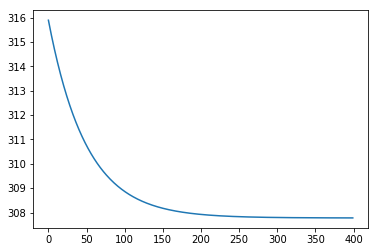

[307.77859888]


In [98]:
plt.plot(loss)
plt.show()
print loss[-1]

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
lr=LinearRegression() ##greedily chooses the weights..
u=lr.fit(X_train,y_train)

In [101]:
lr.score(X_test,y_test)

0.9648349573655703